# Inference Notebook for Face Recognition Model

## Introduction
This notebook demonstrates how to perform inference using the trained VGG19-based face recognition model (`model_t2`). The goal is to recognize faces from new images using the saved model.

## Load Libraries and Model
First, we need to import the necessary libraries and load the saved model.



In [8]:
import os
import cv2
import glob as gb
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import splitfolders
from math import ceil
import gc
import joblib
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential, save_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense,Dropout,Conv2D, MaxPooling2D, Flatten, Input, BatchNormalization
from keras.applications.vgg19 import VGG19, preprocess_input
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Loading data
data_path = r'11_sets_Hispanics'

splitfolders.ratio(data_path, output="output", seed=101, ratio=(.8, .1, .1)) #train, validation, test

In [10]:
# Define path

main_path = 'output'
train_path = os.path.join(main_path, 'train')
test_path = os.path.join(main_path, 'val')

In [11]:
# Check how many data in `train_path` and `test_path`
def check_path(path):
  labels = os.listdir(path)
  for label in labels:
    num_data = len(os.listdir(os.path.join(path, label)))
    print(f'Total Data - {label} : {num_data}')

print('Train Path')
check_path(train_path)
print('')

print('Test Path')
check_path(test_path)
print('')

Train Path
Total Data - 0001cc1e1e--61af8513667cba1b47349869_age_25_name_Weslley : 14
Total Data - 0001cc1e1e--61af86f374501f072edf6d2c_age_22_name_Juliana : 14
Total Data - 0001cc1e1e--61af892e1735844b198f7269_age_28_name_Luis : 14
Total Data - 0001cc1e1e--61af89eea5a19325b68a2801_age_28_name_Rayanne : 14
Total Data - 0001cc1e1e--61af8a351735844b198f7ade_age_26_name_Fernanda : 14
Total Data - 0001cc1e1e--61af8aa9d46ff461a71462cc_age_31_name_Daiane : 14
Total Data - 0001cc1e1e--61af8b9119bf98074e184806_age_32_name_Alejandra : 14
Total Data - 0001cc1e1e--61af8bd7667cba1b473506bd_age_34_name_Romulo : 14
Total Data - 0001cc1e1e--61af8d2aad9d9c12b4864776_age_23_name_Matheus : 14
Total Data - 0001cc1e1e--61af8d4045612c79df65d153_age_20_name_Bruno : 14
Total Data - 0001cc1e1e--61af91e464610d607e3a329e_age_20_name_Gabriel : 14

Test Path
Total Data - 0001cc1e1e--61af8513667cba1b47349869_age_25_name_Weslley : 4
Total Data - 0001cc1e1e--61af86f374501f072edf6d2c_age_22_name_Juliana : 4
Total Dat

In [12]:
# Define hyperparameters
img_height= 228
img_width= 228
batch_size= 128

In [13]:
# Create batch generator for train-set, val-set, and test-set

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.,
                                                                validation_split=0.3)

train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(img_height,img_width),
                                              class_mode='sparse',
                                              subset='training',
                                              batch_size=batch_size,
                                              shuffle=True,
                                              seed=2)

val_set = train_datagen.flow_from_directory(train_path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            subset='validation',
                                            batch_size=batch_size,
                                            shuffle=True,
                                            seed=2)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size=(img_height,img_width),
                                            class_mode='sparse',
                                            batch_size=batch_size,
                                            shuffle=False,
                                            seed=2)

Found 110 images belonging to 11 classes.
Found 44 images belonging to 11 classes.
Found 44 images belonging to 11 classes.


In [14]:
model = tf.keras.models.load_model('model_t2.h5')

In [15]:
# Get the summary of the model
model_summary = []
model.summary(print_fn=lambda x: model_summary.append(x))
model_summary = "\n".join(model_summary)

In [16]:
# Extract model summary
layer_info = []
for layer in model.layers:
    layer_info.append({
        "Layer Name": layer.name,
        "Output Shape": layer.output_shape,
        "Number of Parameters": layer.count_params(),
        "Trainable": layer.trainable
    })

# Create DataFrame
df_model_summary = pd.DataFrame(layer_info)

# Display DataFrame
print(df_model_summary)

                 Layer Name           Output Shape  Number of Parameters  \
0                   input_1  [(None, 224, 224, 3)]                     0   
1                     vgg19      (None, 7, 7, 512)              20024384   
2  global_average_pooling2d            (None, 512)                     0   
3                     dense            (None, 512)                262656   
4                   dropout            (None, 512)                     0   
5                   dense_1            (None, 256)                131328   
6                 dropout_1            (None, 256)                     0   
7                   dense_2             (None, 11)                  2827   

   Trainable  
0       True  
1       True  
2       True  
3       True  
4       True  
5       True  
6       True  
7       True  


In [17]:

# Perform prediction
predictions = model.predict(val_set)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())


1/1 [==============================] - 10s 10s/step


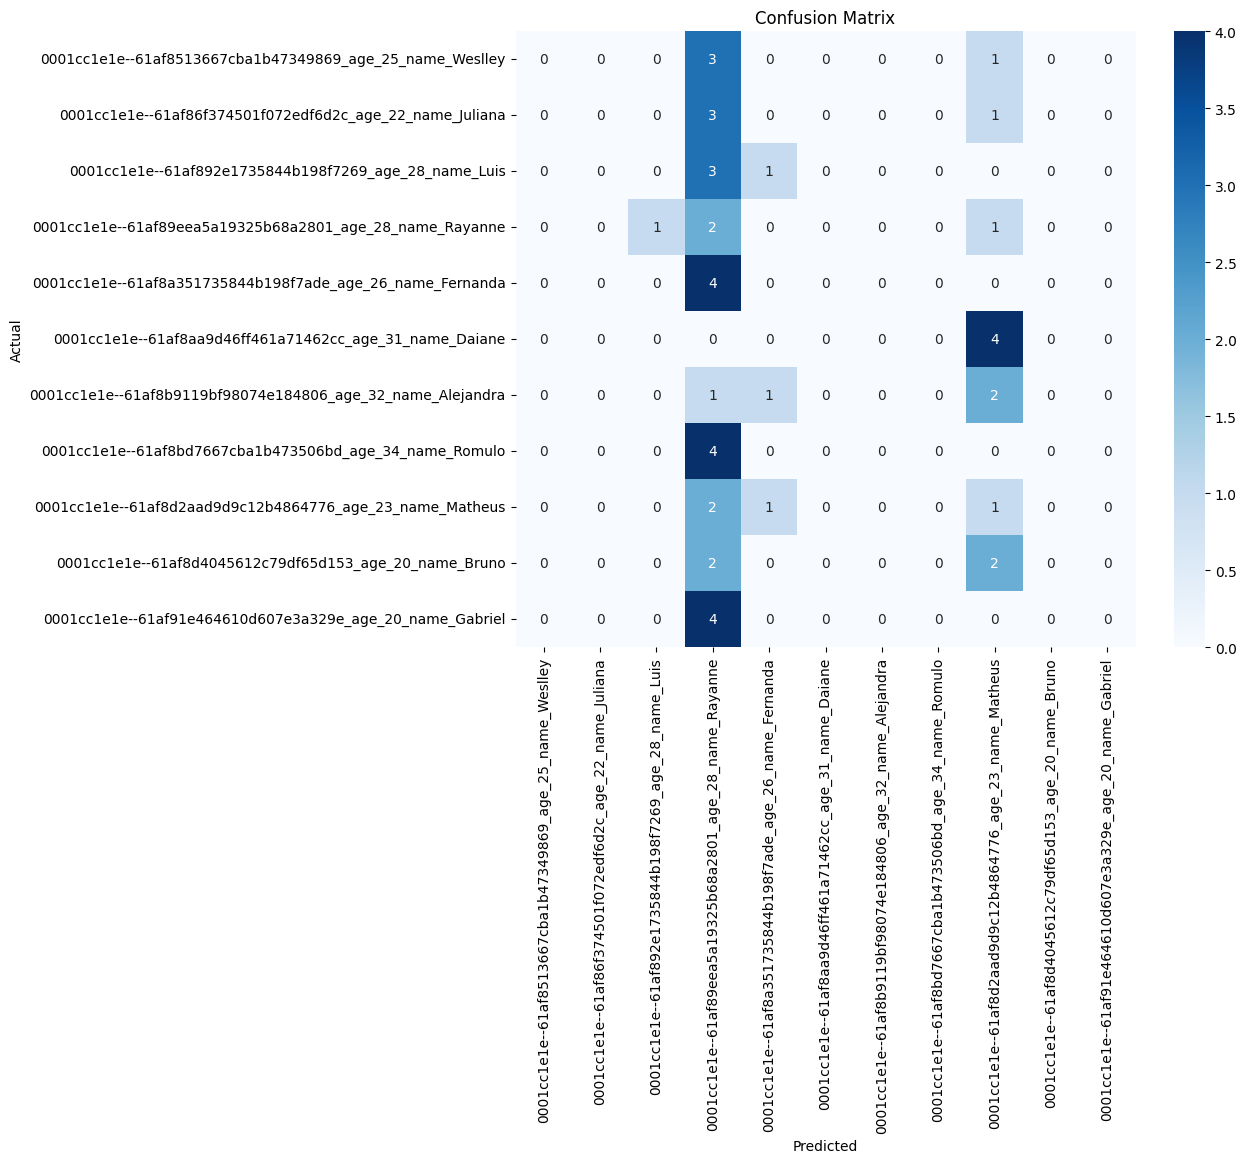

Classification Report:
                                                            precision    recall  f1-score   support

  0001cc1e1e--61af8513667cba1b47349869_age_25_name_Weslley       0.00      0.00      0.00         4
  0001cc1e1e--61af86f374501f072edf6d2c_age_22_name_Juliana       0.00      0.00      0.00         4
     0001cc1e1e--61af892e1735844b198f7269_age_28_name_Luis       0.00      0.00      0.00         4
  0001cc1e1e--61af89eea5a19325b68a2801_age_28_name_Rayanne       0.07      0.50      0.12         4
 0001cc1e1e--61af8a351735844b198f7ade_age_26_name_Fernanda       0.00      0.00      0.00         4
   0001cc1e1e--61af8aa9d46ff461a71462cc_age_31_name_Daiane       0.00      0.00      0.00         4
0001cc1e1e--61af8b9119bf98074e184806_age_32_name_Alejandra       0.00      0.00      0.00         4
   0001cc1e1e--61af8bd7667cba1b473506bd_age_34_name_Romulo       0.00      0.00      0.00         4
  0001cc1e1e--61af8d2aad9d9c12b4864776_age_23_name_Matheus       0.08      0

In [18]:

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)


**Conclusion**

In this notebook, we demonstrated the process of performing inference using a pre-trained VGG19-based face recognition model. The main steps included:

1. **Loading Libraries and Model**: We started by importing the necessary libraries and loading the pre-trained model.
2. **Data Preparation**: We used the `ImageDataGenerator` to prepare the training, validation, and test sets.
3. **Performing Inference**: The model was used to predict the classes of the test set images.
4. **Evaluation**: We evaluated the model's performance using a confusion matrix and a classification report.

The results from the confusion matrix and classification report indicate that the model is not performing well, as it predicts all images as a single class. This suggests potential issues such as overfitting or insufficient training data.

**Next Steps**:
- **Improve dataset**: Insufficient dataset might be causing the model to overfit
- **Data Augmentation**: Apply more extensive data augmentation techniques to the training data to improve the model's generalization.
- **Hyperparameter Tuning**: Adjust hyperparameters such as learning rate, batch size, and the number of epochs to optimize model performance.
- **Model Complexity**: Consider using a more complex model or fine-tuning a pre-trained model on a larger dataset.

By addressing these aspects, we aim to improve the model's accuracy and robustness in recognizing faces from new images.
